# Face Detection by OpenCV

Use two pre-trained classifiers of OpenCV for face detection:
    - Haar Classifier
    - LPB Classifier

## Haar Detector
Haar classifier is a machine learning based approach created by Paul Viola and Michael Jones. It is trained on many positive and negative images and starts by extracting Haar features from each training image.

In [9]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
from sklearn.decomposition.pca import PCA
from sklearn.neighbors import KNeighborsClassifier
import math

In [79]:
def haarDetection(testImage):
    # Parameter specifying how much the image size is reduced at each image scale
    face_scaleFactor = 1.5
    eye_scaleFactor = 1.2
    # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
    face_minNeighbors = 10
    eye_minNeighbors = 12

    # Get OpenCV datapath
    data_path = cv2.data.haarcascades
    face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_frontalface_default.xml'))
    eye_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'haarcascade_eye.xml'))

    img = cv2.imread(testImage)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #  rectangle should have to retain
    faces = face_cascade.detectMultiScale(img_gray, face_scaleFactor,face_minNeighbors)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),3)
        roi_gray = img_gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, eye_scaleFactor, eye_minNeighbors)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 3)

    # display images
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Input test Image"), plt.xticks([]), plt.yticks([])
    plt.show()

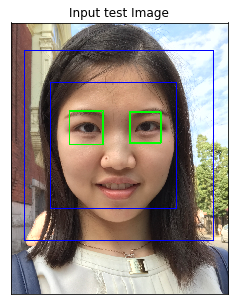

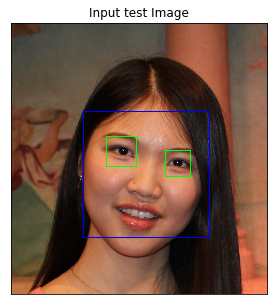

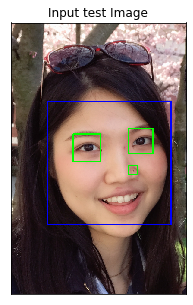

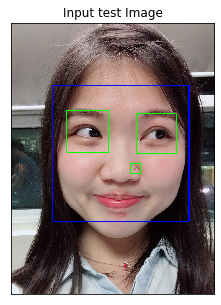

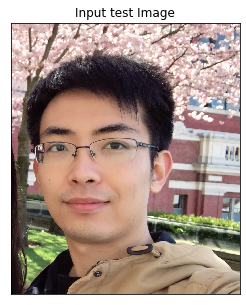

In [80]:
testDataDir = "./testDataste/"
for file in os.listdir(testDataDir):
    if file.endswith(".png") or file.endswith(".jpg"): 
        haarDetection(testDataDir+file)
        continue
    else:
        continue





## LBP Cascade Classifier

In [102]:
def lbpDetetction(testImage):
    # Parameter specifying how much the image size is reduced at each image scale
    face_scaleFactor = 1.3
    # Parameter specifying how many neighbors each candidate rectangle should have to retain it.
    face_minNeighbors = 3
    
    data_path = cv2.data.haarcascades

    lbp_face_cascade = cv2.CascadeClassifier( os.path.join(data_path, 'lbpcascade_frontalface.xml'))
    lbp_face_cascade
    img = cv2.imread(testImage)

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # detect faces
    lbp_faces = lbp_face_cascade.detectMultiScale(img_gray, face_scaleFactor,face_minNeighbors)
    for (x,y,w,h) in lbp_faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 3)

    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Input Image"), plt.xticks([]), plt.yticks([])
    plt.show()

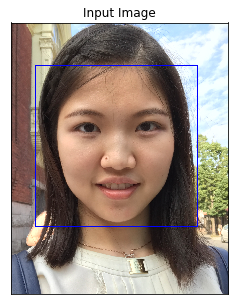

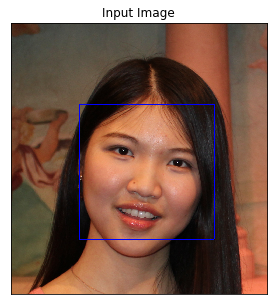

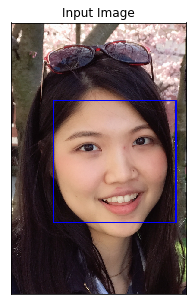

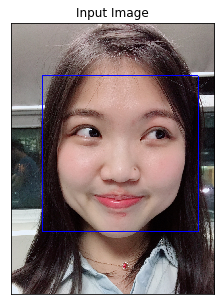

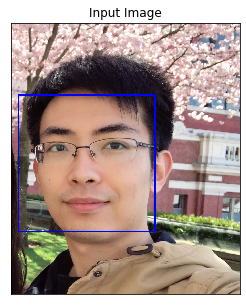

In [103]:
testDataDir = "./testDataste/"
for file in os.listdir(testDataDir):
    if file.endswith(".png") or file.endswith(".jpg"): 
        lbpDetetction(testDataDir+file)
        continue
    else:
        continue